# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Big Data Real-Time Analytics com Python e Spark</font>

# <font color='blue'>Capítulo 8</font>

### *********** Atenção: *********** 
Utilize Java JDK 1.8 e Apache Spark 2.4.2

Java JDK 1.8:

https://www.oracle.com/technetwork/java/javase/downloads/jdk8-downloads-2133151.html

*Caso receba mensagem de erro "name 'sc' is not defined", interrompa o pyspark e apague o diretório metastore_db no mesmo diretório onde está este Jupyter notebook*

# Spark SQL

O Spark SQL é usado para acessar dados estruturados com Spark.

#### Acesse http://localhost:4040 sempre que quiser acompanhar a execução dos jobs. 
#### Pacotes adicionais podem ser encontrados aqui: https://spark-packages.org/ (usaremos um destes pacotes para conexão com o MongoDB).

## Spark SQL - Spark Session e SQL Context

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.sql import Row

In [2]:
print(sc)

<SparkContext master=local[*] appName=PySparkShell>


In [3]:
# Spark Session - usado para trabalhar com o Spark
spSession = SparkSession.builder.master("local").appName("analytics_SparkSQL").getOrCreate()

In [4]:
# Criando o SQL Context para trabalhar com Spark SQL
sqlContext = SQLContext(sc)

In [5]:
# Importando o arquivo e criando um RDD
linhasRDD1 = sc.textFile("data/carros.csv")

In [6]:
linhasRDD1.count()

198

In [7]:
# Removendo a primeira linha - Transformação 1 ou lazy evaluation
linhasRDD2 = linhasRDD1.filter(lambda x: "FUELTYPE" not in x)

In [8]:
linhasRDD2.count()

197

In [10]:
# Dividindo o conjunto de dados em colunas - Transformação 2
linhasRDD3 = linhasRDD2.map(lambda line: line.split(","))

In [11]:
# Dividindo o conjunto de dados em colunas - Transformação 3
# row extrai cada linha do meu RDD dando mais ou menos uma extrutura ao RDD
linhasRDD4 = linhasRDD3.map(lambda p: Row(make = p[0], body = p[4], hp = int(p[7])))

In [12]:
print(linhasRDD4)

PythonRDD[4] at RDD at PythonRDD.scala:53


In [9]:
?Row

In [13]:
linhasRDD4.collect()

[Row(make='subaru', body='hatchback', hp=69),
 Row(make='chevrolet', body='hatchback', hp=48),
 Row(make='mazda', body='hatchback', hp=68),
 Row(make='toyota', body='hatchback', hp=62),
 Row(make='mitsubishi', body='hatchback', hp=68),
 Row(make='honda', body='hatchback', hp=60),
 Row(make='nissan', body='sedan', hp=69),
 Row(make='dodge', body='hatchback', hp=68),
 Row(make='plymouth', body='hatchback', hp=68),
 Row(make='mazda', body='hatchback', hp=68),
 Row(make='mitsubishi', body='hatchback', hp=68),
 Row(make='dodge', body='hatchback', hp=68),
 Row(make='plymouth', body='hatchback', hp=68),
 Row(make='chevrolet', body='hatchback', hp=70),
 Row(make='toyota', body='hatchback', hp=62),
 Row(make='dodge', body='hatchback', hp=68),
 Row(make='honda', body='hatchback', hp=58),
 Row(make='toyota', body='hatchback', hp=62),
 Row(make='honda', body='hatchback', hp=76),
 Row(make='chevrolet', body='sedan', hp=70),
 Row(make='nissan', body='sedan', hp=69),
 Row(make='mitsubishi', body='hat

In [14]:
# Criando um dataframe a partir do RDD
linhasDF = spSession.createDataFrame(linhasRDD4)

In [15]:
linhasDF.show()

+----------+---------+---+
|      make|     body| hp|
+----------+---------+---+
|    subaru|hatchback| 69|
| chevrolet|hatchback| 48|
|     mazda|hatchback| 68|
|    toyota|hatchback| 62|
|mitsubishi|hatchback| 68|
|     honda|hatchback| 60|
|    nissan|    sedan| 69|
|     dodge|hatchback| 68|
|  plymouth|hatchback| 68|
|     mazda|hatchback| 68|
|mitsubishi|hatchback| 68|
|     dodge|hatchback| 68|
|  plymouth|hatchback| 68|
| chevrolet|hatchback| 70|
|    toyota|hatchback| 62|
|     dodge|hatchback| 68|
|     honda|hatchback| 58|
|    toyota|hatchback| 62|
|     honda|hatchback| 76|
| chevrolet|    sedan| 70|
+----------+---------+---+
only showing top 20 rows



In [16]:
type(linhasDF)

pyspark.sql.dataframe.DataFrame

In [17]:
# Mesma coisa que: SELECT * FROM linhasDF
linhasDF.select("*").show()

+----------+---------+---+
|      make|     body| hp|
+----------+---------+---+
|    subaru|hatchback| 69|
| chevrolet|hatchback| 48|
|     mazda|hatchback| 68|
|    toyota|hatchback| 62|
|mitsubishi|hatchback| 68|
|     honda|hatchback| 60|
|    nissan|    sedan| 69|
|     dodge|hatchback| 68|
|  plymouth|hatchback| 68|
|     mazda|hatchback| 68|
|mitsubishi|hatchback| 68|
|     dodge|hatchback| 68|
|  plymouth|hatchback| 68|
| chevrolet|hatchback| 70|
|    toyota|hatchback| 62|
|     dodge|hatchback| 68|
|     honda|hatchback| 58|
|    toyota|hatchback| 62|
|     honda|hatchback| 76|
| chevrolet|    sedan| 70|
+----------+---------+---+
only showing top 20 rows



In [20]:
linhasDF.select('make', 'hp').show()

+----------+---+
|      make| hp|
+----------+---+
|    subaru| 69|
| chevrolet| 48|
|     mazda| 68|
|    toyota| 62|
|mitsubishi| 68|
|     honda| 60|
|    nissan| 69|
|     dodge| 68|
|  plymouth| 68|
|     mazda| 68|
|mitsubishi| 68|
|     dodge| 68|
|  plymouth| 68|
| chevrolet| 70|
|    toyota| 62|
|     dodge| 68|
|     honda| 58|
|    toyota| 62|
|     honda| 76|
| chevrolet| 70|
+----------+---+
only showing top 20 rows



In [18]:
# Mesma coisa que: SELECT * FROM linhasDF ORDER BY make
linhasDF.orderBy("make").show()

+-----------+-----------+---+
|       make|       body| hp|
+-----------+-----------+---+
|alfa-romero|  hatchback|154|
|alfa-romero|convertible|111|
|alfa-romero|convertible|111|
|       audi|      sedan|110|
|       audi|      sedan|115|
|       audi|      sedan|110|
|       audi|      wagon|110|
|       audi|      sedan|140|
|       audi|      sedan|102|
|        bmw|      sedan|101|
|        bmw|      sedan|101|
|        bmw|      sedan|121|
|        bmw|      sedan|121|
|        bmw|      sedan|182|
|        bmw|      sedan|182|
|        bmw|      sedan|121|
|        bmw|      sedan|182|
|  chevrolet|      sedan| 70|
|  chevrolet|  hatchback| 70|
|  chevrolet|  hatchback| 48|
+-----------+-----------+---+
only showing top 20 rows



In [38]:
linhasDF.select('*').orderBy('make', 'hp').sort(linhasDF.hp.desc()).show()

+-------------+-----------+---+
|         make|       body| hp|
+-------------+-----------+---+
|       jaguar|      sedan|262|
|      porsche|    hardtop|207|
|      porsche|convertible|207|
|      porsche|    hardtop|207|
|       nissan|  hatchback|200|
|mercedes-benz|      sedan|184|
|mercedes-benz|    hardtop|184|
|          bmw|      sedan|182|
|          bmw|      sedan|182|
|          bmw|      sedan|182|
|       jaguar|      sedan|176|
|       jaguar|      sedan|176|
|      mercury|  hatchback|175|
|        volvo|      wagon|162|
|        volvo|      sedan|162|
|       toyota|  hatchback|161|
|       toyota|  hatchback|161|
|         saab|      sedan|160|
|       nissan|  hatchback|160|
|         saab|  hatchback|160|
+-------------+-----------+---+
only showing top 20 rows



In [35]:
# Registrando o dataframe como uma Temp Table
linhasDF.createOrReplaceTempView("linhasTB")

- Tabelas temporárias são necessárias caso eu queira executar query direto do Spark como no exemplo abaixo.

In [36]:
# Executando queries SQL ANSI
spSession.sql("select * from linhasTB where make = 'nissan'").show()

+------+---------+---+
|  make|     body| hp|
+------+---------+---+
|nissan|    sedan| 69|
|nissan|    sedan| 69|
|nissan|    sedan| 69|
|nissan|    sedan| 55|
|nissan|    sedan| 69|
|nissan|    wagon| 69|
|nissan|    sedan| 69|
|nissan|hatchback| 69|
|nissan|    wagon| 69|
|nissan|  hardtop| 69|
|nissan|hatchback| 97|
|nissan|    sedan| 97|
|nissan|    sedan|152|
|nissan|    sedan|152|
|nissan|    wagon|152|
|nissan|hatchback|160|
|nissan|hatchback|160|
|nissan|hatchback|200|
+------+---------+---+



In [37]:
# Executando queries SQL ANSI
spSession.sql("select make, body, avg(hp) from linhasTB group by make, body").show()

+-------------+-----------+-----------------+
|         make|       body|          avg(hp)|
+-------------+-----------+-----------------+
|       nissan|      wagon|96.66666666666667|
|       subaru|      sedan|             90.2|
|     plymouth|      sedan|             68.0|
|        dodge|  hatchback|             90.2|
|       nissan|      sedan|             89.0|
|        honda|      sedan|             89.8|
|   mitsubishi|  hatchback|            105.0|
|        mazda|      sedan|82.66666666666667|
|  alfa-romero|convertible|            111.0|
|mercedes-benz|convertible|            155.0|
|     plymouth|      wagon|             88.0|
|mercedes-benz|      wagon|            123.0|
|        isuzu|  hatchback|             90.0|
|       toyota|convertible|            116.0|
|        mazda|  hatchback|             89.4|
|    chevrolet|      sedan|             70.0|
|      mercury|  hatchback|            175.0|
|      porsche|  hatchback|            143.0|
|        honda|      wagon|       

## Spark SQL e Arquivos CSV

In [39]:
carrosDF = spSession.read.csv("data/carros.csv", header = True)

In [40]:
type(carrosDF)

pyspark.sql.dataframe.DataFrame

In [41]:
carrosDF.show()

+----------+--------+------+-----+---------+-----+---------+---+----+--------+-------+-----+
|      MAKE|FUELTYPE|ASPIRE|DOORS|     BODY|DRIVE|CYLINDERS| HP| RPM|MPG-CITY|MPG-HWY|PRICE|
+----------+--------+------+-----+---------+-----+---------+---+----+--------+-------+-----+
|    subaru|     gas|   std|  two|hatchback|  fwd|     four| 69|4900|      31|     36| 5118|
| chevrolet|     gas|   std|  two|hatchback|  fwd|    three| 48|5100|      47|     53| 5151|
|     mazda|     gas|   std|  two|hatchback|  fwd|     four| 68|5000|      30|     31| 5195|
|    toyota|     gas|   std|  two|hatchback|  fwd|     four| 62|4800|      35|     39| 5348|
|mitsubishi|     gas|   std|  two|hatchback|  fwd|     four| 68|5500|      37|     41| 5389|
|     honda|     gas|   std|  two|hatchback|  fwd|     four| 60|5500|      38|     42| 5399|
|    nissan|     gas|   std|  two|    sedan|  fwd|     four| 69|5200|      31|     37| 5499|
|     dodge|     gas|   std|  two|hatchback|  fwd|     four| 68|5500| 

In [42]:
# Registrando o dataframe como uma Temp Table
carrosDF.createOrReplaceTempView("carrosTB")

In [43]:
# Executando queries SQL ANSI
spSession.sql("select make, hp, price from carrosTB where CYLINDERS = 'three'").show()

+---------+---+-----+
|     make| hp|price|
+---------+---+-----+
|chevrolet| 48| 5151|
+---------+---+-----+



In [47]:
# Executando queries SQL ANSI
spSession.sql("select make, hp, price from carrosTB where CYLINDERS = 'six'").show()

+-----------+---+-----+
|       make| hp|price|
+-----------+---+-----+
|     nissan|152|13499|
|     nissan|152|13499|
|     nissan|152|14399|
|     toyota|156|15690|
|     toyota|156|15750|
|     toyota|161|15998|
|alfa-romero|154|16500|
|     toyota|161|16558|
|     nissan|160|17199|
|     nissan|160|18399|
|     nissan|200|19699|
|        bmw|121|20970|
|        bmw|121|21105|
|      volvo|134|21485|
|      volvo|106|22470|
|        bmw|121|24565|
|        bmw|182|30760|
|     jaguar|176|32250|
|    porsche|207|32528|
|    porsche|207|34028|
+-----------+---+-----+
only showing top 20 rows



In [48]:
carrosTT = spSession.sql("select make, hp, price from carrosTB where CYLINDERS = 'three'")

In [49]:
carrosTT.show()

+---------+---+-----+
|     make| hp|price|
+---------+---+-----+
|chevrolet| 48| 5151|
+---------+---+-----+



In [50]:
type(carrosTT)

pyspark.sql.dataframe.DataFrame

## Aplicando Machine Learning

In [51]:
# Carregando o arquivo CSV e mantendo o objeto em cache
carros = sc.textFile("data/carros.csv")
carros.cache()

data/carros.csv MapPartitionsRDD[84] at textFile at NativeMethodAccessorImpl.java:0

In [53]:
# Remove a primeira linha (header)
primeiraLinha = carros.first()
linhas = carros.filter(lambda x: x != primeiraLinha)
linhas.count()

197

In [52]:
carros.count()

198

In [61]:
carros.collect()

['MAKE,FUELTYPE,ASPIRE,DOORS,BODY,DRIVE,CYLINDERS,HP,RPM,MPG-CITY,MPG-HWY,PRICE',
 'subaru,gas,std,two,hatchback,fwd,four,69,4900,31,36,5118',
 'chevrolet,gas,std,two,hatchback,fwd,three,48,5100,47,53,5151',
 'mazda,gas,std,two,hatchback,fwd,four,68,5000,30,31,5195',
 'toyota,gas,std,two,hatchback,fwd,four,62,4800,35,39,5348',
 'mitsubishi,gas,std,two,hatchback,fwd,four,68,5500,37,41,5389',
 'honda,gas,std,two,hatchback,fwd,four,60,5500,38,42,5399',
 'nissan,gas,std,two,sedan,fwd,four,69,5200,31,37,5499',
 'dodge,gas,std,two,hatchback,fwd,four,68,5500,37,41,5572',
 'plymouth,gas,std,two,hatchback,fwd,four,68,5500,37,41,5572',
 'mazda,gas,std,two,hatchback,fwd,four,68,5000,31,38,6095',
 'mitsubishi,gas,std,two,hatchback,fwd,four,68,5500,31,38,6189',
 'dodge,gas,std,four,hatchback,fwd,four,68,5500,31,38,6229',
 'plymouth,gas,std,four,hatchback,fwd,four,68,5500,31,38,6229',
 'chevrolet,gas,std,two,hatchback,fwd,four,70,5400,38,43,6295',
 'toyota,gas,std,two,hatchback,fwd,four,62,4800,31,3

In [60]:
linhas.collect()

['subaru,gas,std,two,hatchback,fwd,four,69,4900,31,36,5118',
 'chevrolet,gas,std,two,hatchback,fwd,three,48,5100,47,53,5151',
 'mazda,gas,std,two,hatchback,fwd,four,68,5000,30,31,5195',
 'toyota,gas,std,two,hatchback,fwd,four,62,4800,35,39,5348',
 'mitsubishi,gas,std,two,hatchback,fwd,four,68,5500,37,41,5389',
 'honda,gas,std,two,hatchback,fwd,four,60,5500,38,42,5399',
 'nissan,gas,std,two,sedan,fwd,four,69,5200,31,37,5499',
 'dodge,gas,std,two,hatchback,fwd,four,68,5500,37,41,5572',
 'plymouth,gas,std,two,hatchback,fwd,four,68,5500,37,41,5572',
 'mazda,gas,std,two,hatchback,fwd,four,68,5000,31,38,6095',
 'mitsubishi,gas,std,two,hatchback,fwd,four,68,5500,31,38,6189',
 'dodge,gas,std,four,hatchback,fwd,four,68,5500,31,38,6229',
 'plymouth,gas,std,four,hatchback,fwd,four,68,5500,31,38,6229',
 'chevrolet,gas,std,two,hatchback,fwd,four,70,5400,38,43,6295',
 'toyota,gas,std,two,hatchback,fwd,four,62,4800,31,38,6338',
 'dodge,gas,std,two,hatchback,fwd,four,68,5500,31,38,6377',
 'honda,gas,s

In [54]:
# Importando função row
from pyspark.sql import Row

In [55]:
# Convertendo para um vetor de linhas
def transformToNumeric(inputStr) :
    
    attList = inputStr.split(",")
    
    doors = 1.0 if attList[3] == "two" else 2.0
    
    body = 1.0 if attList[4] == "sedan" else 2.0 
       
    # Filtrando colunas não necessárias nesta etapa
    valores = Row(DOORS = doors, BODY = float(body), HP = float(attList[7]), RPM = float(attList[8]), MPG = float(attList[9]))
    return valores

In [56]:
# Aplicando a função aos dados e persistindo o resultado em memória
autoMap = linhas.map(transformToNumeric)
autoMap.persist()
autoMap.collect()

[Row(DOORS=1.0, BODY=2.0, HP=69.0, RPM=4900.0, MPG=31.0),
 Row(DOORS=1.0, BODY=2.0, HP=48.0, RPM=5100.0, MPG=47.0),
 Row(DOORS=1.0, BODY=2.0, HP=68.0, RPM=5000.0, MPG=30.0),
 Row(DOORS=1.0, BODY=2.0, HP=62.0, RPM=4800.0, MPG=35.0),
 Row(DOORS=1.0, BODY=2.0, HP=68.0, RPM=5500.0, MPG=37.0),
 Row(DOORS=1.0, BODY=2.0, HP=60.0, RPM=5500.0, MPG=38.0),
 Row(DOORS=1.0, BODY=1.0, HP=69.0, RPM=5200.0, MPG=31.0),
 Row(DOORS=1.0, BODY=2.0, HP=68.0, RPM=5500.0, MPG=37.0),
 Row(DOORS=1.0, BODY=2.0, HP=68.0, RPM=5500.0, MPG=37.0),
 Row(DOORS=1.0, BODY=2.0, HP=68.0, RPM=5000.0, MPG=31.0),
 Row(DOORS=1.0, BODY=2.0, HP=68.0, RPM=5500.0, MPG=31.0),
 Row(DOORS=2.0, BODY=2.0, HP=68.0, RPM=5500.0, MPG=31.0),
 Row(DOORS=2.0, BODY=2.0, HP=68.0, RPM=5500.0, MPG=31.0),
 Row(DOORS=1.0, BODY=2.0, HP=70.0, RPM=5400.0, MPG=38.0),
 Row(DOORS=1.0, BODY=2.0, HP=62.0, RPM=4800.0, MPG=31.0),
 Row(DOORS=1.0, BODY=2.0, HP=68.0, RPM=5500.0, MPG=31.0),
 Row(DOORS=1.0, BODY=2.0, HP=58.0, RPM=4800.0, MPG=49.0),
 Row(DOORS=2.0

In [57]:
# Criando o Dataframe
carrosDf = spSession.createDataFrame(autoMap)
carrosDf.show()

+-----+----+----+------+----+
|DOORS|BODY|  HP|   RPM| MPG|
+-----+----+----+------+----+
|  1.0| 2.0|69.0|4900.0|31.0|
|  1.0| 2.0|48.0|5100.0|47.0|
|  1.0| 2.0|68.0|5000.0|30.0|
|  1.0| 2.0|62.0|4800.0|35.0|
|  1.0| 2.0|68.0|5500.0|37.0|
|  1.0| 2.0|60.0|5500.0|38.0|
|  1.0| 1.0|69.0|5200.0|31.0|
|  1.0| 2.0|68.0|5500.0|37.0|
|  1.0| 2.0|68.0|5500.0|37.0|
|  1.0| 2.0|68.0|5000.0|31.0|
|  1.0| 2.0|68.0|5500.0|31.0|
|  2.0| 2.0|68.0|5500.0|31.0|
|  2.0| 2.0|68.0|5500.0|31.0|
|  1.0| 2.0|70.0|5400.0|38.0|
|  1.0| 2.0|62.0|4800.0|31.0|
|  1.0| 2.0|68.0|5500.0|31.0|
|  1.0| 2.0|58.0|4800.0|49.0|
|  2.0| 2.0|62.0|4800.0|31.0|
|  1.0| 2.0|76.0|6000.0|30.0|
|  2.0| 1.0|70.0|5400.0|38.0|
+-----+----+----+------+----+
only showing top 20 rows



In [114]:
# Sumarizando as estatísticas do conjunto de dados
summStats = carrosDf.describe().toPandas()
summStats

,summary,DOORS,BODY,HP,RPM,MPG
0,count,197,197,197,197,197
1,mean,1.5685279187817258,1.532994923857868,103.60406091370558,5118.0203045685275,25.15228426395939
2,stddev,0.49654352778167493,0.5001812579359883,37.639205349518356,481.03591405011446,6.437862917085915
3,min,1.0,1.0,48.0,4150.0,13.0
4,max,2.0,2.0,262.0,6600.0,49.0


In [87]:
# summStats.colums =summStats.iloc[0]

/tmp/ipykernel_764601/2087841836.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  summStats.colums =summStats.iloc[0]


In [88]:
# summStats.rename(columns=summStats.iloc[0], inplace = True)

In [89]:
# summStats.drop(['summary'])

,count,mean,stddev,min,max
DOORS,197,1.5685279187817258,0.49654352778167493,1.0,2.0
BODY,197,1.532994923857868,0.5001812579359883,1.0,2.0
HP,197,103.60406091370558,37.639205349518356,48.0,262.0
RPM,197,5118.0203045685275,481.03591405011446,4150.0,6600.0
MPG,197,25.15228426395939,6.437862917085915,13.0,49.0


In [118]:
# Extraindo as médias
medias = summStats.iloc[1, 1:6].values.tolist()
medias

['1.5685279187817258',
 '1.532994923857868',
 '103.60406091370558',
 '5118.0203045685275',
 '25.15228426395939']

In [117]:
# Extraindo o desvio padrão
desvios_padroes = summStats.iloc[2, 1:6].values.tolist()
desvios_padroes

['0.49654352778167493',
 '0.5001812579359883',
 '37.639205349518356',
 '481.03591405011446',
 '6.437862917085915']

In [119]:
# Inserindo a média e o desvio padrão em uma variável do tipo broadcast 
bcMedias = sc.broadcast(medias)
bcDesviosP = sc.broadcast(desvios_padroes)

In [120]:
# Importando a Função Vectors
from pyspark.ml.linalg import Vectors

In [121]:
# Função para normalizar os dados e criar um vetor denso
def centerAndScale(inRow) :
    global bcMedias
    global bcDesviosP
    
    meanArray = bcMedias.value
    stdArray = bcDesviosP.value

    retArray = []
    
    for i in range(len(meanArray)):
        retArray.append( (float(inRow[i]) - float(meanArray[i])) / float(stdArray[i]) ) #normalização
    return Vectors.dense(retArray)

In [123]:
!pip install numpy

     |████████████████████████████████| 11.5MB 2.4MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for numpy: filename=numpy-1.22.3-cp38-cp38-linux_x86_64.whl size=24413678 sha256=6c7b01a2c284e3f3e1472c92d2581dadff4cc89e995056dfbd57f8b2ef9c69bb
  Stored in directory: /home/marxcerqueira/.cache/pip/wheels/21/37/10/81a13af5964837a3627457192fbc14d926b1a2dcd810f70fbf
Successfully built numpy
You should consider upgrading via the 'pip install --upgrade pip' command.


In [124]:
# Aplicando a normalização aos dados
csAuto = carrosDf.rdd.map(centerAndScale)
csAuto.collect()

[DenseVector([-1.145, 0.9337, -0.9194, -0.4532, 0.9083]),
 DenseVector([-1.145, 0.9337, -1.4773, -0.0375, 3.3936]),
 DenseVector([-1.145, 0.9337, -0.9459, -0.2453, 0.753]),
 DenseVector([-1.145, 0.9337, -1.1053, -0.6611, 1.5297]),
 DenseVector([-1.145, 0.9337, -0.9459, 0.7941, 1.8403]),
 DenseVector([-1.145, 0.9337, -1.1585, 0.7941, 1.9956]),
 DenseVector([-1.145, -1.0656, -0.9194, 0.1704, 0.9083]),
 DenseVector([-1.145, 0.9337, -0.9459, 0.7941, 1.8403]),
 DenseVector([-1.145, 0.9337, -0.9459, 0.7941, 1.8403]),
 DenseVector([-1.145, 0.9337, -0.9459, -0.2453, 0.9083]),
 DenseVector([-1.145, 0.9337, -0.9459, 0.7941, 0.9083]),
 DenseVector([0.869, 0.9337, -0.9459, 0.7941, 0.9083]),
 DenseVector([0.869, 0.9337, -0.9459, 0.7941, 0.9083]),
 DenseVector([-1.145, 0.9337, -0.8928, 0.5862, 1.9956]),
 DenseVector([-1.145, 0.9337, -1.1053, -0.6611, 0.9083]),
 DenseVector([-1.145, 0.9337, -0.9459, 0.7941, 0.9083]),
 DenseVector([-1.145, 0.9337, -1.2116, -0.6611, 3.7043]),
 DenseVector([0.869, 0.933

In [125]:
# Criando um Spark Dataframe com as features (atributos)
autoRows = csAuto.map(lambda f: Row(features = f))
autoDf = spSession.createDataFrame(autoRows)
autoDf.select("features").show(10)

+--------------------+
|            features|
+--------------------+
|[-1.1449709581789...|
|[-1.1449709581789...|
|[-1.1449709581789...|
|[-1.1449709581789...|
|[-1.1449709581789...|
|[-1.1449709581789...|
|[-1.1449709581789...|
|[-1.1449709581789...|
|[-1.1449709581789...|
|[-1.1449709581789...|
+--------------------+
only showing top 10 rows



In [131]:
# Importando o algoritmo K-Means para clusterização
from pyspark.ml.clustering import KMeans
kmeans = KMeans(k = 3, seed = 1)
modelo = kmeans.fit(autoDf)
previsoes = modelo.transform(autoDf)
previsoes.show()

+--------------------+----------+
|            features|prediction|
+--------------------+----------+
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[0.86895117361793...|         0|
|[0.86895117361793...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[0.86895117361793...|         0|
|[-1.1449709581789...|         0|
|[0.86895117361793...|         0|
+--------------------+----------+
only showing top 20 rows



In [132]:
# Plot dos resultados
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [133]:
# Função para leitura dos dados e plotagem
def unstripData(instr) :
    return ( instr["prediction"], instr["features"][0], instr["features"][1],instr["features"][2],instr["features"][3])


In [134]:
# Organizando os dados para o Plot
unstripped = previsoes.rdd.map(unstripData)
predList = unstripped.collect()
predPd = pd.DataFrame(predList)

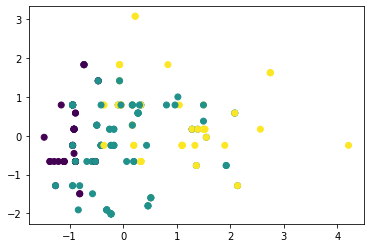

In [135]:
plt.cla()
plt.scatter(predPd[3], predPd[4], c = predPd[0])

## Spark SQL e Arquivos JSON

Neste site você pode validar a estrutura de um arquivo JSON: http://jsonlint.com/

json mt usado em arquivos vindos da web

In [136]:
# Importando o arquivo JSON
funcDF = spSession.read.json("data/funcionarios.json")

In [137]:
funcDF.show()

+------+-----+----------------+-------+----+
|deptid|idade|            nome|salario|sexo|
+------+-----+----------------+-------+----+
|  1000|   42|  Gilmar Rezende|   5000|   m|
|  2000|   50|  Matias Tavares|   8500|   m|
|  1000|   36|   Paulo Miranda|   9700|   m|
|  1000|   41|Ana Paula Soares|   9500|   f|
|  2000|   34|   Carolina Maia|   6500|   m|
+------+-----+----------------+-------+----+



In [139]:
funcDF.printSchema() #padrão de organização do arquivo

root
 |-- deptid: string (nullable = true)
 |-- idade: string (nullable = true)
 |-- nome: string (nullable = true)
 |-- salario: string (nullable = true)
 |-- sexo: string (nullable = true)



In [138]:
type(funcDF)

pyspark.sql.dataframe.DataFrame

In [140]:
# Operações com Dataframe Spark SQL - select()
funcDF.select("nome").show()

+----------------+
|            nome|
+----------------+
|  Gilmar Rezende|
|  Matias Tavares|
|   Paulo Miranda|
|Ana Paula Soares|
|   Carolina Maia|
+----------------+



In [141]:
# Operações com Dataframe Spark SQL - filter()
funcDF.filter(funcDF['idade'] == 50).show()

+------+-----+--------------+-------+----+
|deptid|idade|          nome|salario|sexo|
+------+-----+--------------+-------+----+
|  2000|   50|Matias Tavares|   8500|   m|
+------+-----+--------------+-------+----+



In [154]:
type(funcDF)

pyspark.sql.dataframe.DataFrame

In [142]:
# Operações com Dataframe Spark SQL - groupBy()
funcDF.groupBy("sexo").count().show()

+----+-----+
|sexo|count|
+----+-----+
|   m|    4|
|   f|    1|
+----+-----+



In [143]:
# Operações com Dataframe Spark SQL - groupBy()
funcDF.groupBy("deptid").agg({"salario": "avg", "idade": "max"}).show()

+------+----------+-----------------+
|deptid|max(idade)|     avg(salario)|
+------+----------+-----------------+
|  2000|        50|           7500.0|
|  1000|        42|8066.666666666667|
+------+----------+-----------------+



In [144]:
# Registrando o dataframe como uma Temp Table
funcDF.registerTempTable("funcTB")

In [145]:
# Executando queries SQL ANSI
spSession.sql("select deptid, max(idade), avg(salario) from funcTB group by deptid").show()

+------+----------+----------------------------+
|deptid|max(idade)|avg(CAST(salario AS DOUBLE))|
+------+----------+----------------------------+
|  2000|        50|                      7500.0|
|  1000|        42|           8066.666666666667|
+------+----------+----------------------------+



## Temp Tables

spark sql:
1) dataframe;

2) sql context;

3) spark session

In [146]:
# Registrando o dataframe como temp Table
funcDF.createOrReplaceTempView("funcTB")

In [147]:
spSession.sql("select * from funcTB where salario = 9700").show()

+------+-----+-------------+-------+----+
|deptid|idade|         nome|salario|sexo|
+------+-----+-------------+-------+----+
|  1000|   36|Paulo Miranda|   9700|   m|
+------+-----+-------------+-------+----+



In [148]:
# Criando Temp Table
sqlContext.registerDataFrameAsTable(funcDF, "funcTB2") #só existe em tempo de execução

In [149]:
type(funcTB2)

NameError: name 'funcTB2' is not defined

In [150]:
# Persistindo a Temp Table 
funcTB3 = spSession.table("funcTB2")

In [151]:
type(funcTB3)

pyspark.sql.dataframe.DataFrame

In [152]:
# Comparando o Dataframe com a tabela temporária criada
# verifica se ouve alguma alteração durante uma manipulação
sorted(funcDF.collect()) == sorted(funcTB3.collect())

True

In [153]:
# Aplicando o filtro
sqlContext.registerDataFrameAsTable(funcDF, "funcTB2")
funcTB3 = spSession.table("funcTB2")
funcTB3.filter("idade = '42'").first()

Row(deptid='1000', idade='42', nome='Gilmar Rezende', salario='5000', sexo='m')

In [155]:
# Drop Temp Table
sqlContext.dropTempTable("funcTB2")

## Banco de Dados Relacional

Extraindo Dados do MySQL. Primeiro precisamos baixar o driver JDBC. Haverá um driver JDBC para cada banco de dados que você conectar (Oracle, SQL Server, etc...)

1- Download do Driver JDBC para o MySQL: http://dev.mysql.com/downloads/connector/j/

2- Baixar o arquivo .zip

3- Descompactar o arquivo e copiar o arquivo mysql-connector-java-8.0.16.jar para a pasta /opt/Spark/jars ou para SO Windows em C:\Spark\jars

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
spSession = SparkSession.builder.master("local").appName("Analytics-SparkSQL").getOrCreate()
sqlContext = SQLContext(sc)

In [ ]:
mysql_df = spSession.read.format("jdbc").options(
    url = "jdbc:mysql://localhost/carros",
    serverTimezone = "UTC",
    driver = "com.mysql.jdbc.Driver",
    dbtable = "carrosTB",
    user = "root",
    password = "dsa1234").load()

In [ ]:
mysql_df.show()

In [ ]:
mysql_df.registerTempTable("carrostb")

In [ ]:
spSession.sql("select * from carrostb where hp = '68'").show()

## Banco de Dados Não-Relacional

Spark Connector: https://docs.mongodb.com/spark-connector/current/

Mongo Spark: https://spark-packages.org/package/mongodb/mongo-spark

$SPARK_HOME/bin/pyspark --packages org.mongodb.spark:mongo-spark-connector_2.11:2.4.0

In [3]:
sc.version

'3.0.3'

In [2]:
# Imports
from pyspark.sql import SparkSession

### Leitura

In [4]:
# Cria a sessão
my_spark = SparkSession \
    .builder \
    .appName("myApp") \
    .config("spark.mongodb.input.uri", "mongodb://localhost:27017/test_db.test_collection") \
    .config("spark.mongodb.output.uri", "mongodb://localhost:27017/test_db.test_collection") \
    .getOrCreate()

In [5]:
# Carrega os dados do MongoDB no Spark
dados = spark.read.format("com.mongodb.spark.sql.DefaultSource").load()

In [6]:
dados.printSchema()

root
 |-- _id: struct (nullable = true)
 |    |-- oid: string (nullable = true)
 |-- item: string (nullable = true)
 |-- qty: double (nullable = true)
 |-- size: struct (nullable = true)
 |    |-- h: double (nullable = true)
 |    |-- w: double (nullable = true)
 |    |-- uom: string (nullable = true)
 |-- tags: array (nullable = true)
 |    |-- element: string (containsNull = true)



In [7]:
dados.count()

6

In [8]:
dados.head()

Row(_id=Row(oid='625c6ea8ecf26b29ea4dba91'), item='Camisa Polo', qty=25.0, size=Row(h=14.0, w=21.0, uom='cm'), tags=['branco', 'vermelho'])

In [9]:
dados.show()

+--------------------+---------------+----+-----------------+------------------+
|                 _id|           item| qty|             size|              tags|
+--------------------+---------------+----+-----------------+------------------+
|[625c6ea8ecf26b29...|    Camisa Polo|25.0| [14.0, 21.0, cm]|[branco, vermelho]|
|[625c6ea8ecf26b29...|Vestido Bordado|85.0| [27.9, 35.5, cm]|           [cinza]|
|[625c6ea8ecf26b29...|        Moleton|45.0|[19.0, 22.85, cm]|     [verde, azul]|
|[625c776e83ace296...|    Camisa Polo|25.0| [14.0, 21.0, cm]|[branco, vermelho]|
|[625c776e83ace296...|Vestido Bordado|85.0| [27.9, 35.5, cm]|           [cinza]|
|[625c776e83ace296...|        Moleton|45.0|[19.0, 22.85, cm]|     [verde, azul]|
+--------------------+---------------+----+-----------------+------------------+



In [10]:
type(dados)

pyspark.sql.dataframe.DataFrame

### Gravação

In [11]:
registro = spark.createDataFrame([("Camisa T-Shirt",  50)], ["item", "qty"])

In [12]:
registro.write.format("com.mongodb.spark.sql.DefaultSource").mode("append").save()

In [13]:
dados.show()

+--------------------+---------------+----+-----------------+------------------+
|                 _id|           item| qty|             size|              tags|
+--------------------+---------------+----+-----------------+------------------+
|[625c6ea8ecf26b29...|    Camisa Polo|25.0| [14.0, 21.0, cm]|[branco, vermelho]|
|[625c6ea8ecf26b29...|Vestido Bordado|85.0| [27.9, 35.5, cm]|           [cinza]|
|[625c6ea8ecf26b29...|        Moleton|45.0|[19.0, 22.85, cm]|     [verde, azul]|
|[625c776e83ace296...|    Camisa Polo|25.0| [14.0, 21.0, cm]|[branco, vermelho]|
|[625c776e83ace296...|Vestido Bordado|85.0| [27.9, 35.5, cm]|           [cinza]|
|[625c776e83ace296...|        Moleton|45.0|[19.0, 22.85, cm]|     [verde, azul]|
|[625c7b8b58d2be7a...| Camisa T-Shirt|50.0|             null|              null|
+--------------------+---------------+----+-----------------+------------------+

